# Communicate

In [119]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = hide"""<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Insist on trade-offs

In [121]:
hide_code_in_slideshow()
lift = np.arange(0.01, 0.05, 0.01)
benefits = pd.DataFrame({'lift': lift, 
                        'benefit': 100000*20*lift})
benefits

,lift,benefit
0,0.01,20000.0
1,0.02,40000.0
2,0.03,60000.0
3,0.04,80000.0


In [122]:
mandays = np.arange(20, 60, 10)

costs = pd.DataFrame({'mandays':mandays, 
                     'cost': mandays*500*3})
costs

,mandays,cost
0,20,30000
1,30,45000
2,40,60000
3,50,75000


<!-- ![image.png](attachment:92073e51-ceac-469c-a422-ef34f1d777bb.png) -->
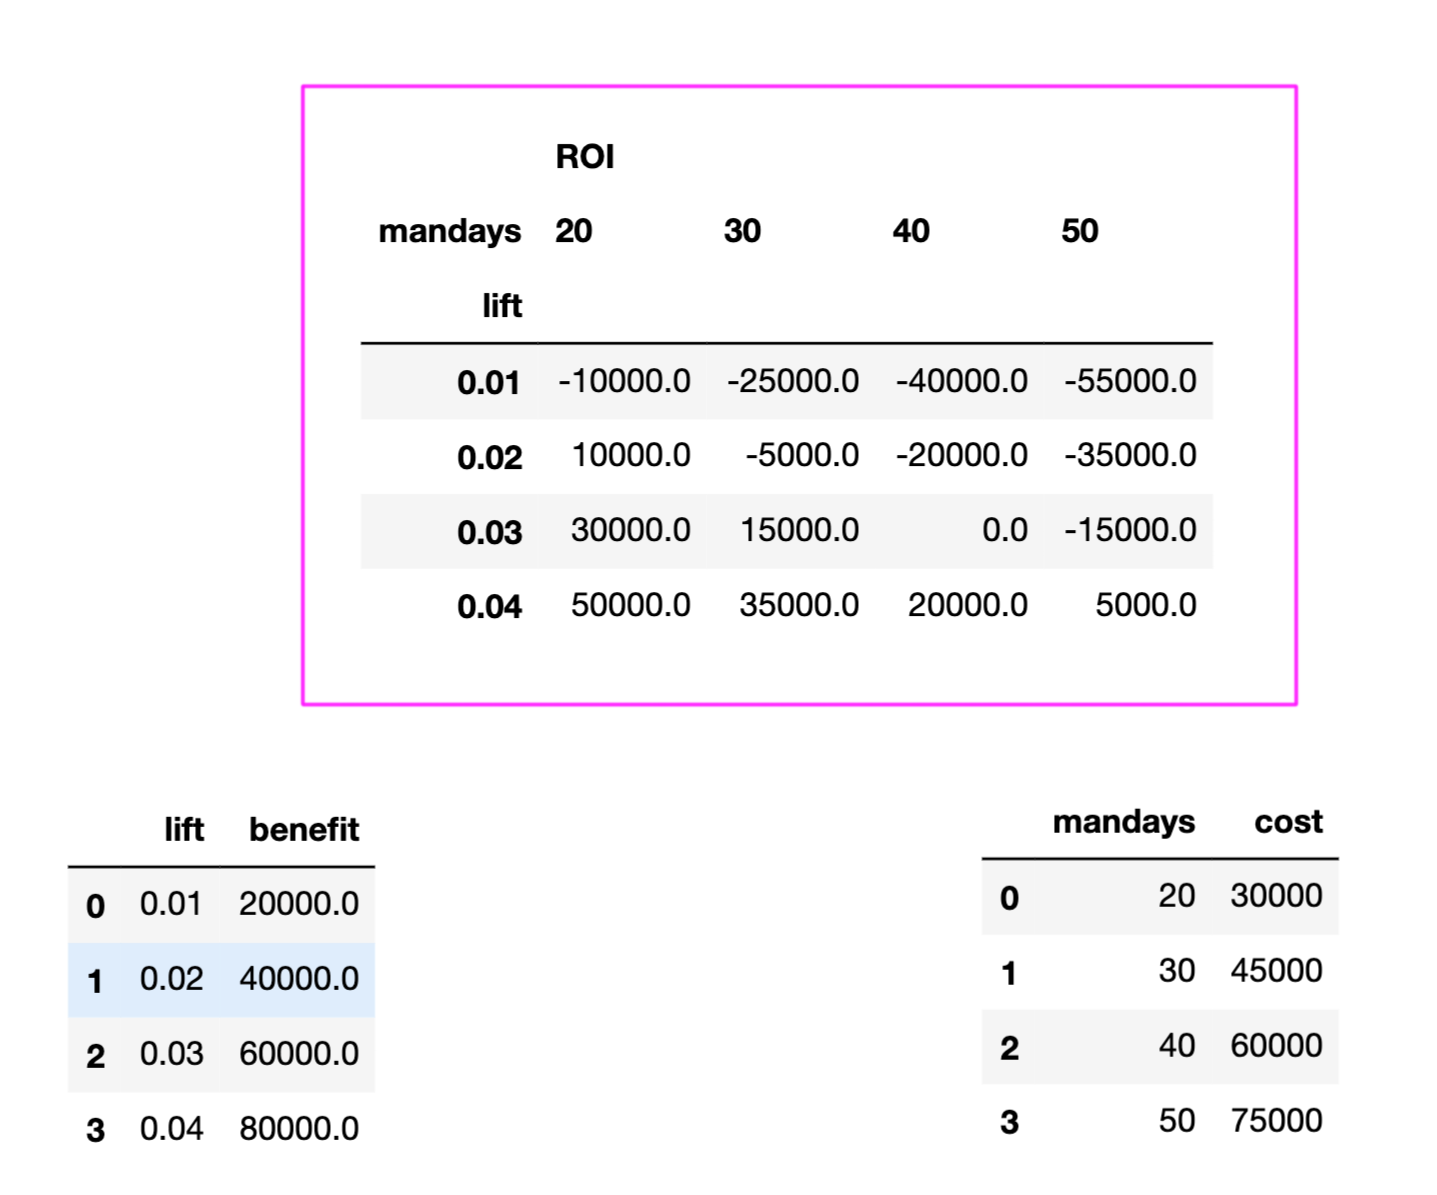

In [8]:
costs['ones'] = 1
benefits['ones'] = 1
benefits

,lift,benefit,ones
0,0.01,20000.0,1
1,0.02,40000.0,1
2,0.03,60000.0,1
3,0.04,80000.0,1


In [50]:
sensitivity = pd.merge(benefits, costs, on='ones').drop('ones', axis=1)
sensitivity

,lift,benefit,mandays,cost
0,0.01,20000.0,20,30000
1,0.01,20000.0,30,45000
2,0.01,20000.0,40,60000
3,0.01,20000.0,50,75000
4,0.02,40000.0,20,30000
5,0.02,40000.0,30,45000
6,0.02,40000.0,40,60000
7,0.02,40000.0,50,75000
8,0.03,60000.0,20,30000
9,0.03,60000.0,30,45000


In [51]:
sensitivity['ROI'] = sensitivity['benefit'] - sensitivity['cost']
s = sensitivity[['lift', 'mandays', 'ROI']]
s

,lift,mandays,ROI
0,0.01,20,-10000.0
1,0.01,30,-25000.0
2,0.01,40,-40000.0
3,0.01,50,-55000.0
4,0.02,20,10000.0
5,0.02,30,-5000.0
6,0.02,40,-20000.0
7,0.02,50,-35000.0
8,0.03,20,30000.0
9,0.03,30,15000.0


In [52]:
# pd.pivot(s, index='lift', columns='mandays', values='ROI')

In [58]:
s = s.set_index(['lift', 'mandays']).unstack()

In [59]:
s.style.applymap(lambda x: 'color: red' if x < 0 else None)

## Powerful forms of communication

### args and kwargs

In [79]:
def foo(required: str, second_required: int, *args, **kwargs) -> str:
    """This is the function docstring"""
    print('required:   ', required)
    print('second required:   ', second_required)
    if args:
        print('args:         ', args)
    if kwargs:
        print('kwargs:       ', kwargs)

In [72]:
foo(1, 2, 3, 'asdfas', dict={ 'dict': 'value '}, bar=True)

required:    1
args:          (2, 3, 'asdfas')
kwargs:        {'dict': {'dict': 'value '}, 'bar': True}


In [80]:
a_list = [1,2,3]
a_dict = {'bar': 5, 'key': 10}

foo(*a_list, bar=5)

required:    1
second required:    2
args:          (3,)
kwargs:        {'bar': 5}


#### Practical example:

In [93]:
class Car():
    available_colors = ['grey', 'red', 'white', 'black', 'pink']

    def __init__(self, brand, color, **kwargs):
        '''Describe what the method does'''
        self.color = color
        self.brand = brand
        self.started = False
        self.__dict__.update(kwargs)

In [94]:
class SportsCar(Car):
    available_colors = ['red', 'white', 'yellow']
    
        def __init__(self, horsepower, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.horsepower = horsepower

In [97]:
sven = SportsCar(700, 'toyota', 'pink', price=50_000, nickname="Pink Panther")
sven.__dict__

{'color': 'pink',
 'brand': 'toyota',
 'started': False,
 'price': 50000,
 'nickname': 'Pink Panther',
 'horsepower': 700}

We can use `update` to add/edit keys in the dictionary

In [87]:
d = {'a':1, 'b':2}
d.update({'c': 3}); d

{'a': 1, 'b': 2, 'c': 3}

## Interactive tools

In [98]:
from IPython.display import HTML, IFrame
IFrame("https://www.youtube.com/embed/8QiPFmIMxFc?start=388", width="560", height="315")

### `ipywidgets` for Jupyter Notebook

In [ ]:
# For Jupyter Lab, run:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [3]:
from ipywidgets import interact, interact_manual

In [6]:
@interact
def plot_polynom(a=[0,1,2,3], b=2, add_grid=False):
    x = np.arange(-10, 10, 0.1)
    y = a*x**3+ b*x**2
    
    plt.plot(x,y); plt.xlim(xmin=-10, xmax=10); plt.ylim(ymin=-100, ymax=100)
    if add_grid:
        plt.grid()
        
# plot_polynom(a=1)

interactive(children=(Dropdown(description='a', options=(0, 1, 2, 3), value=0), IntSlider(value=2, description…

### Python decorators

In [115]:
def my_decorator(func):
    def wrapper():
        print("I'm before the method call")
        func()
        print("I'm after the method call")
    return wrapper

@my_decorator
def say():
    print("hi!")
    
# decorated_say = my_decorator(say)


# # def decorated_say():
# #     print("I'm before the method call")
# #     say()
# #     print("I'm after the method call")

# decorated_say()

say()

I'm before the method call
hi!
I'm after the method call


In [116]:
!pwd

/Users/trouni/Code/lewagon/lectures/data-science/Decision Science/05 Communicate


In [ ]:
🔥🚀